# Лабораторная работа №1
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

In [ ]:
import sys
sys.path.insert(0, '/home/ivmig/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/lab_1/')
print(sys.path)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA


colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Инициализация данных
```
    Обозначения см. в описании Л.Р. №1
    
```

In [3]:
# Словарь параметров
p_d = {}

In [4]:
# Заданные положительные величины
p_d['a'], p_d['l'], p_d['v'], p_d['T'] = 1., 1., 10., 2.

# Решение тестового примера
def x(s, t):
    return math.sin(t) + math.sin(s + math.pi / 2.)

# Плотность источников тепла
def f(s, t):
    return math.cos(t) + p_d['a'] ** 2 * math.sin(s + math.pi / 2.)
    
# Температура внешней среды
def p(t):
    #return 1. / p_d['v'] * math.cos(p_d['l'] + math.pi / 2) + math.sin(t) + math.sin(p_d['l'] + math.pi / 2)
    return 0.
    
# Распределение температуры в начальный момент времени
def fi(s):
    return math.sin(s + math.pi / 2.)

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['p_min'], p_d['p_max'], p_d['R'] = -100., 100., 100.

p_d['fi(s)'] = fi

# Желаемое распределение температуры
def y(s):
    #return s * math.sin(s + math.pi / 2.)
    return math.sin(p_d['T']) + math.sin(s + math.pi / 2.)

p_d['y(s)'] = y

# Число точек на пространственной и временной сетке соответственно
N = 10
p_d['N'], p_d['M'] = N, 10 + N * N

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 2.0, 0.1, 0.01818181818181818)

---
# Создание модели и управление

In [5]:
model = utils.Lab1OptCtrlModel(p_d)

In [6]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_5

In [7]:
model.solve(criterion, get_alpha, eps=10**-5)

90909.09090909091
1289.62976391
18281.103382
23452.6414815
20273.9158525
18393.9387289
17913.1246032
17030.6216186
17049.2990712
16368.6541946
16581.038622
15971.5396307
14866.6320242
10794.1556683
6080.40711573
2677.74949518
911.699226813
241.929664445
48.6910744363
7.68085494252
0.877106085205
0.111515372215
0.0285541926258
0.0233651629178
0.0202791114493
0.018175607147
0.0162983540208
0.0146697803533
0.0132435059748
0.0119896559661
0.0108830579979
0.00990292040682
0.00903190836175
0.00825547621906
0.00756134787013
0.00693910833504
0.00637987937026
0.00587605943885
0.00542111359227
0.00500940246795
0.00463604222665
0.00429678916356
0.0039879441401
0.00370627304324
0.00344894028273
0.00321345295286
0.00299761376147
0.00279948120062
0.00261733572516
0.00244965093623
0.00229506895038
0.00215237928207
0.00202050068566
0.00189846549847
0.00178540610441
0.00168054320078
0.00158317560316
0.00149267136553
0.00140846002837
0.00133002583653
0.00125690179296
0.00118866443445
0.00112492923274
0.

In [8]:
model.final_step

254

In [9]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

---
# Процесс управления

In [10]:
y_s = model.y_arr
bounds = [min(min(y_s), min(model.x_arr[-1][-1,:])), max(max(y_s), max(model.x_arr[-1][-1,:]))]

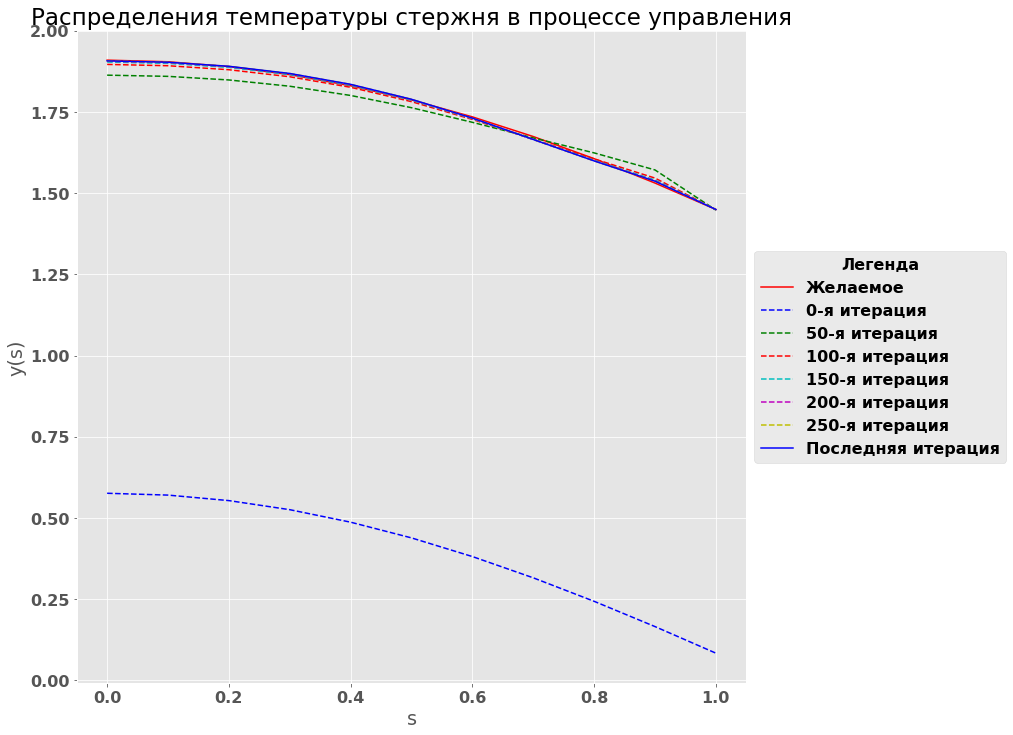

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
part = 1
count = 5
step = int(model.final_step / count / part)
for i in range(0, int(model.final_step / part), step):
    ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
#ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Распределения температуры стержня в процессе управления')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное распределение температур

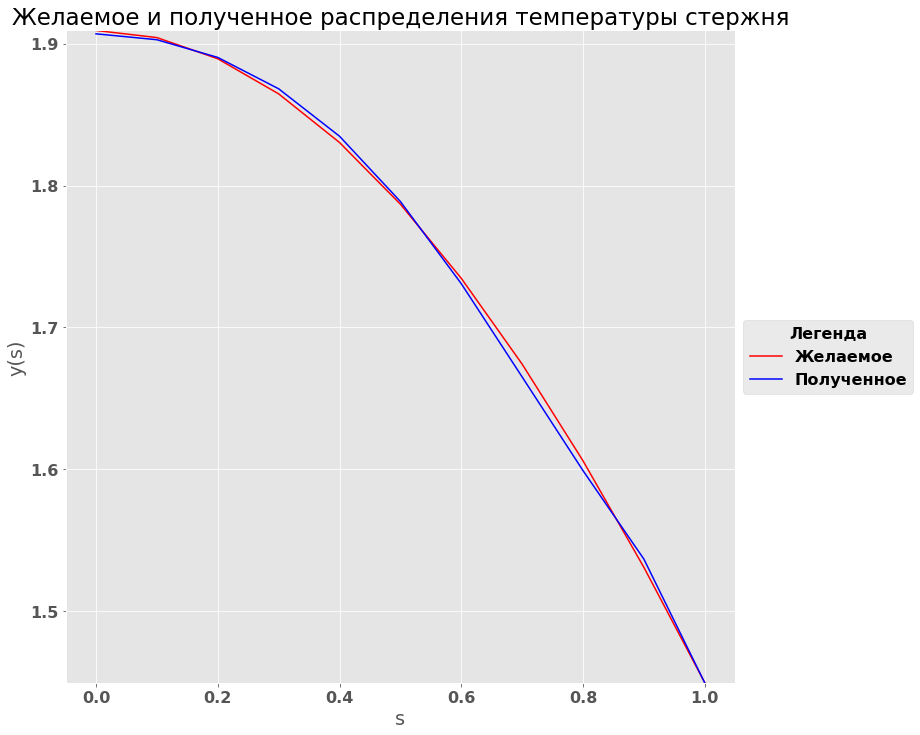

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения температуры стержня')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Управление

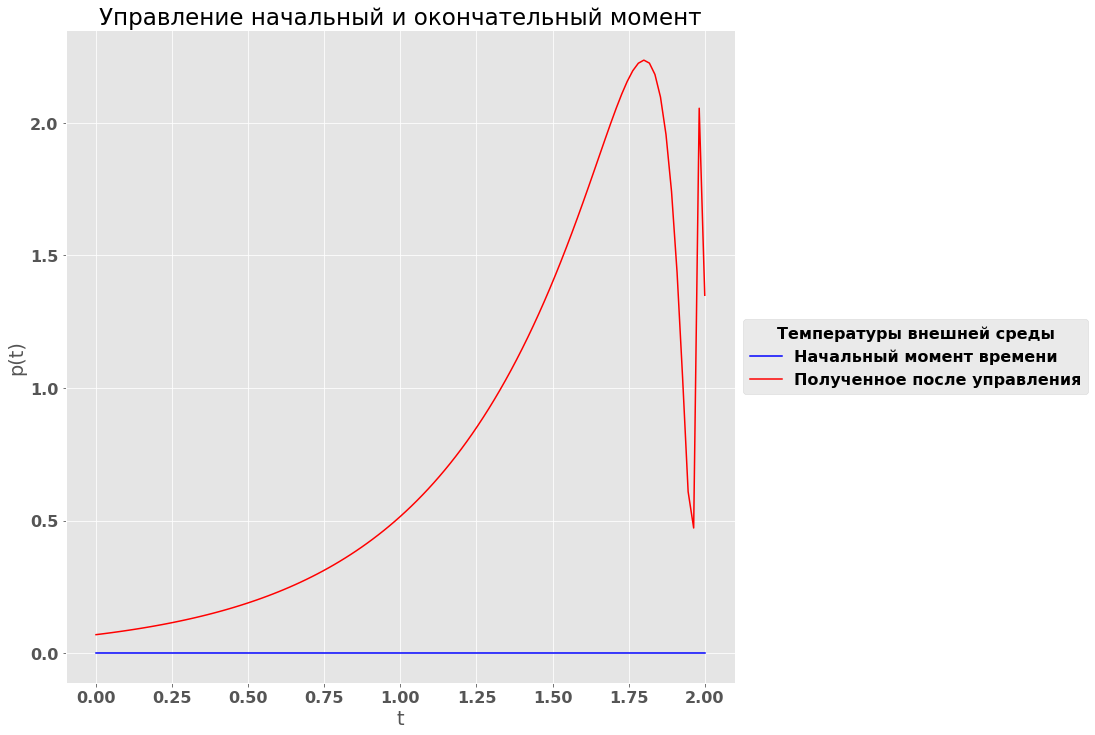

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_, model.p_arr[0], color='b', label='Начальный момент времени')
ax.plot(Y_, model.p_arr[-1], color='r', label='Полученное после управления')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Управление начальный и окончательный момент')
plt.legend(title='Температуры внешней среды', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9792697956693552e-06, 0.10000997926979567)

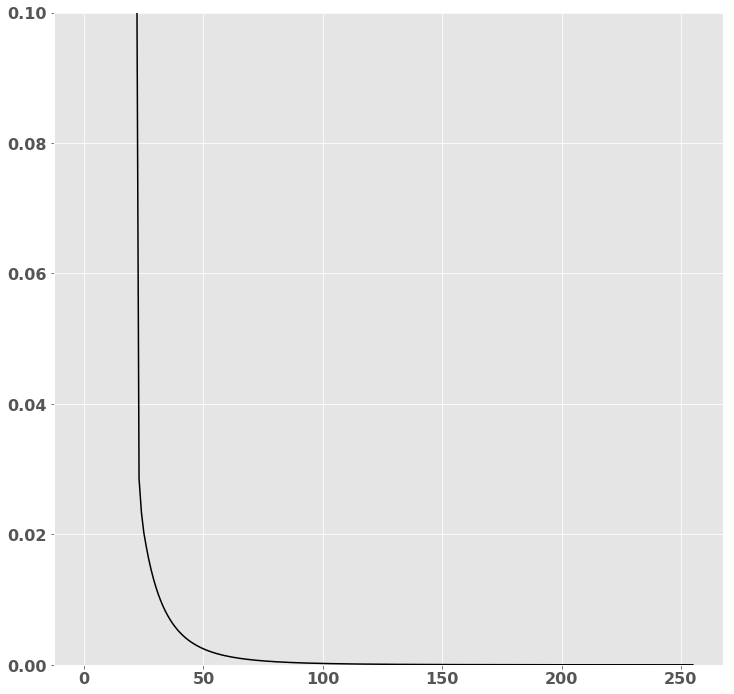

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])